<a href="https://colab.research.google.com/github/hubtru/KI-Trainer/blob/main/KI_Workshop_CIFAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170498071/170498071 [==============================] - 6s 0us/step
Epoch 1/10
800/800 [==============================] - 75s 92ms/step - loss: 1.4364 - accuracy: 0.4837 - val_loss: 1.1849 - val_accuracy: 0.5868
Epoch 2/10
800/800 [==============================] - 72s 90ms/step - loss: 1.0688 - accuracy: 0.6260 - val_loss: 1.0424 - val_accuracy: 0.6411
Epoch 3/10
800/800 [==============================] - 71s 89ms/step - loss: 0.9300 - accuracy: 0.6757 - val_loss: 0.9926 - val_accuracy: 0.6599
Epoch 4/10
800/800 [==============================] - 71s 88ms/step - loss: 0.8125 - accuracy: 0.7163 - val_loss: 0.9206 - val_accuracy: 0.6828
Epoch 5/10
800/800 [==============================] - 70s 87ms/step - loss: 0.7083 - accuracy: 0.7516 - val_loss: 0.9155 - val_accuracy: 0.6936
Epoch 6/10
800/800 [==============================] - 76s 95ms/step - loss: 0.6115 - accuracy: 0.7873 - val_loss: 0.8865 - val_accuracy: 0.7095
Epoch 7/10
800/800 [==============================] - 70s 88ms/step -

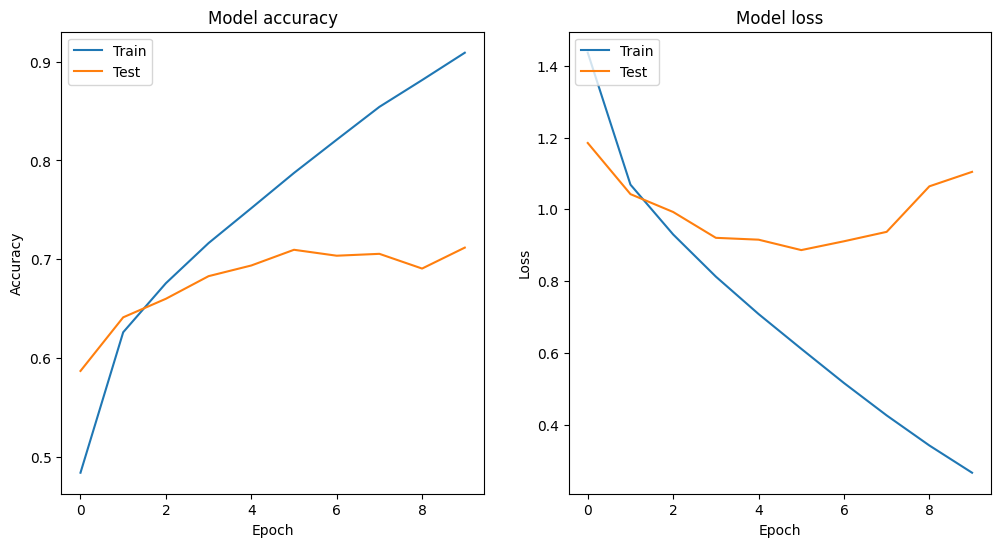

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

# Load CIFAR-10 data
(input_train, target_train), (input_test, target_test) = cifar10.load_data()

# Scale images to the [0, 1] range
input_train = input_train.astype("float32") / 255
input_test = input_test.astype("float32") / 255

# Model configuration
batch_size = 50
img_width, img_height, img_num_channels = 32, 32, 3
loss_function = sparse_categorical_crossentropy
no_classes = 10
no_epochs = 10
optimizer = Adam()
validation_split = 0.2
verbosity = 1

# Build the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, img_num_channels)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(no_classes, activation='softmax'))

# Compile the model
model.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])

# Fit data to model
history = model.fit(input_train, target_train,
            batch_size=batch_size,
            epochs=no_epochs,
            verbose=verbosity,
            validation_split=validation_split)

# Generate generalization metrics
score = model.evaluate(input_test, target_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

# Visualize the model's training progress
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()
